In [7]:
import os
import json
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

JSON_PATH = os.getenv("JSON_PATH")
DATA_PATH = os.getenv('DATA_PATH')
DATA_PATH3 = os.getenv('DATA_PATH3')

In [8]:
with open(JSON_PATH, 'r', encoding='utf-8') as f:
    config = json.load(f)

user = config['POSTGRES_USER']
password = config['POSTGRES_PASSWORD']
host = config['POSTGRES_HOST']
port = config['POSTGRES_PORT']
database = config['POSTGRES_DB2']
table =   config['POSTGRES_GRAMMY']

In [9]:
engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{database}")
query = f"SELECT * FROM {table}"

df = pd.read_sql(query, engine)
df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [10]:
df.describe()

,year
count,4810.000000
mean,1995.566944
std,17.149720
min,1958.000000
25%,1983.000000
50%,1998.000000
75%,2010.000000
max,2019.000000


### Since almost all the columns are of type object and two are datetime, we have a rather empty description.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          4810 non-null   int64              
 1   title         4810 non-null   object             
 2   published_at  4810 non-null   datetime64[ns, UTC]
 3   updated_at    4810 non-null   datetime64[ns, UTC]
 4   category      4810 non-null   object             
 5   nominee       4804 non-null   object             
 6   artist        2970 non-null   object             
 7   workers       2620 non-null   object             
 8   img           3443 non-null   object             
 9   winner        4810 non-null   bool               
dtypes: bool(1), datetime64[ns, UTC](2), int64(1), object(6)
memory usage: 343.0+ KB


### The columns with object data type must be converted into string in order to get better results

## Data Manage

### As we saw in the method .info(), there are a lot of null values in the dataframe, those null values must be managed in order to get better results

In [12]:
df['nominee'] = df['nominee'].fillna('Unknown Nominee')
df['artist'] = df['artist'].fillna('Unknown Artist')
df['workers'] = df['workers'].fillna('Unknown Workers')
df['img'] = df['img'].fillna('No Image')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          4810 non-null   int64              
 1   title         4810 non-null   object             
 2   published_at  4810 non-null   datetime64[ns, UTC]
 3   updated_at    4810 non-null   datetime64[ns, UTC]
 4   category      4810 non-null   object             
 5   nominee       4810 non-null   object             
 6   artist        4810 non-null   object             
 7   workers       4810 non-null   object             
 8   img           4810 non-null   object             
 9   winner        4810 non-null   bool               
dtypes: bool(1), datetime64[ns, UTC](2), int64(1), object(6)
memory usage: 343.0+ KB


In [13]:
df = df.astype({'title': 'string', 'category': 'string', 'nominee': 'string', 'artist': 'string', 'workers': 'string', 'img': 'string', 'winner': 'string'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          4810 non-null   int64              
 1   title         4810 non-null   string             
 2   published_at  4810 non-null   datetime64[ns, UTC]
 3   updated_at    4810 non-null   datetime64[ns, UTC]
 4   category      4810 non-null   string             
 5   nominee       4810 non-null   string             
 6   artist        4810 non-null   string             
 7   workers       4810 non-null   string             
 8   img           4810 non-null   string             
 9   winner        4810 non-null   string             
dtypes: datetime64[ns, UTC](2), int64(1), string(7)
memory usage: 375.9 KB


In [14]:
print(df['winner'].unique())

<StringArray>
['True']
Length: 1, dtype: string


### For our analysis, we have unneded columns that must be remmoved. This will guarantees us some better performance in terms of code execution.

In [15]:
to_eliminate = ['img', 'winner']
df = df.drop(columns= to_eliminate)
df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi..."
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V..."
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ..."
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H..."
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C..."


In [16]:
df.to_csv(DATA_PATH3, index= False)

## Graphics

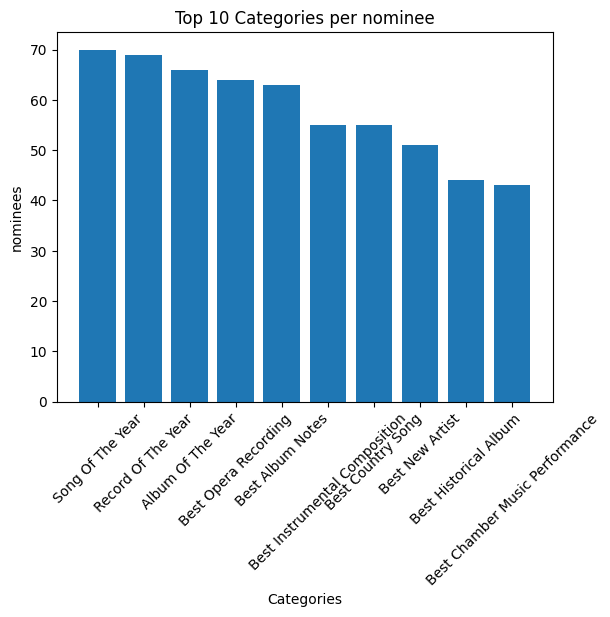

In [17]:
category_counts = df['category'].value_counts()
top_categories = category_counts.head(10)

plt.bar(top_categories.index, top_categories.values)
plt.xlabel('Categories')
plt.ylabel('nominees')
plt.title('Top 10 Categories per nominee')
plt.xticks(rotation=45)
plt.show()

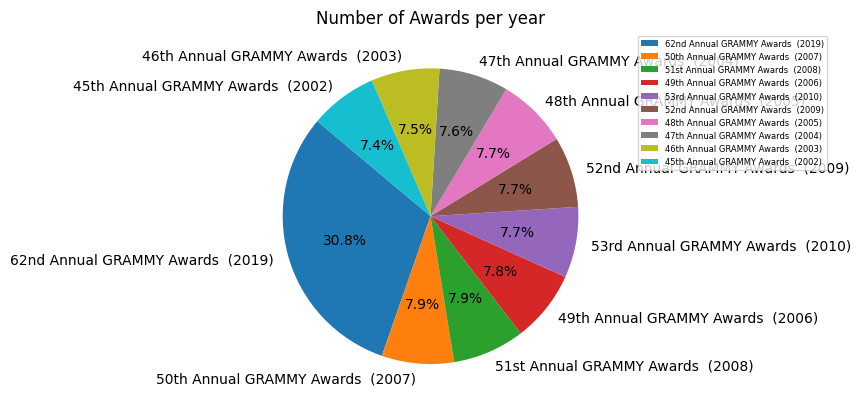

In [18]:
title_count = df['title'].value_counts()
top_title = title_count.head(10)

plt.pie(top_title, labels= top_title.index, autopct= '%1.1f%%', startangle= 140)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 6})
plt.title('Number of Awards per year')
plt.show()

### In this graph we observe that, usually, there was a number of Grammy award winner was constant, however, in 2019 this number increased 4.14 times more on average